# LAB2 - Drzewa decyzyjne

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl

# Wprowadzenie

Drzewa decyzyjne (DT) to nieparametryczna nadzorowana metoda uczenia się stosowana do problemu klasyfikacji i regresji. Celem jest stworzenie modelu, który przewiduje wartość zmiennej docelowej poprzez naukę prostych reguł decyzyjnych wywnioskowanych z funkcji danych.

Niektóre zalety drzew decyzyjnych to:
* łatwe do zrozumienia i interpretacji; drzewa można wizualizować;
* wymagają niewielkiego przygotowania danych; inne techniki często wymagają normalizacji danych;
* koszt korzystania z drzewa (tj. przewidywania danych) jest logarytmiczny w stosunku do liczby punktów danych używanych do trenowania drzewa;
* potrafią obsługiwać zarówno dane liczbowe, jak i jakościowe; inne techniki zwykle specjalizują się w analizie zestawów danych, które mają tylko jeden typ zmiennej;
* potrafią rozwiązywać problemy z wieloma wyjściami;
* drzewa decyzyjne są w znacznym stopniu interpretowalne tzn. możliwe jest wyjaśnienie jakie własności danych wejściowych przyczyniły się do uzyskania wyniku.

Wady drzew decyzyjnych obejmują:
* proces uczenia drzew decyzyjnych może tworzyć nadmiernie złożone drzewa, które nie generalizują dobrze danych; 
* drzewa decyzyjne mogą być niestabilne, ponieważ niewielkie różnice w danych mogą spowodować wygenerowanie zupełnie innego drzewa; 
* problem uczenia się optymalnego drzewa decyzyjnego jest znany jako NP-zupełny; w związku z tym praktyczne algorytmy uczenia się drzewa decyzyjnego opierają się na algorytmach heurystycznych, takich jak algorytm zachłanny, w którym decyzje lokalne są optymalne w każdym węźle; takie algorytmy nie mogą zagwarantować zwrotu optymalnego globalnie drzewa decyzyjnego; 
* istnieją pojęcia trudne do nauczenia, ponieważ drzewa decyzyjne nie wyrażają ich łatwo, takie jak XOR.





## Drzewa decyzyjne - przykład na zbiorze Iris

Zbiór danych *iris*  zawiera 150 instancji opisujących kwiaty Irysa. Kwiaty są określone przy pomocy 4 atrybutów numerycznych opisujących długości i szerokości płatków kwiatu *sepal* i *petal*. Ostatni atrybut jakościowy definiuje gatunek opisywanego Irysa (species). Jednym z problemów możliwych do rozwiązania przy użyciu tego zbioru uczącego jest określenie gatunku dla nowego kwiatu Irysa w zależności od wielkości jego płatków. Jest to przykład zadania klasyfikacji.

Zbiór uczący *iris* jest zbiorem etykietowanym ponieważ klasa, czyli konkretny gatunek irysa jest znany dla każdej instancji (obiektu) w zbiorze uczącym:

https://archive.ics.uci.edu/ml/datasets/iris

```
Source:

Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```


In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()

X, y = load_iris(return_X_y=True)

print('Class labels:', np.unique(y))



Class labels: [0 1 2]


In [2]:
# przygotowanie danych treningowych

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
# uczenie modelu
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

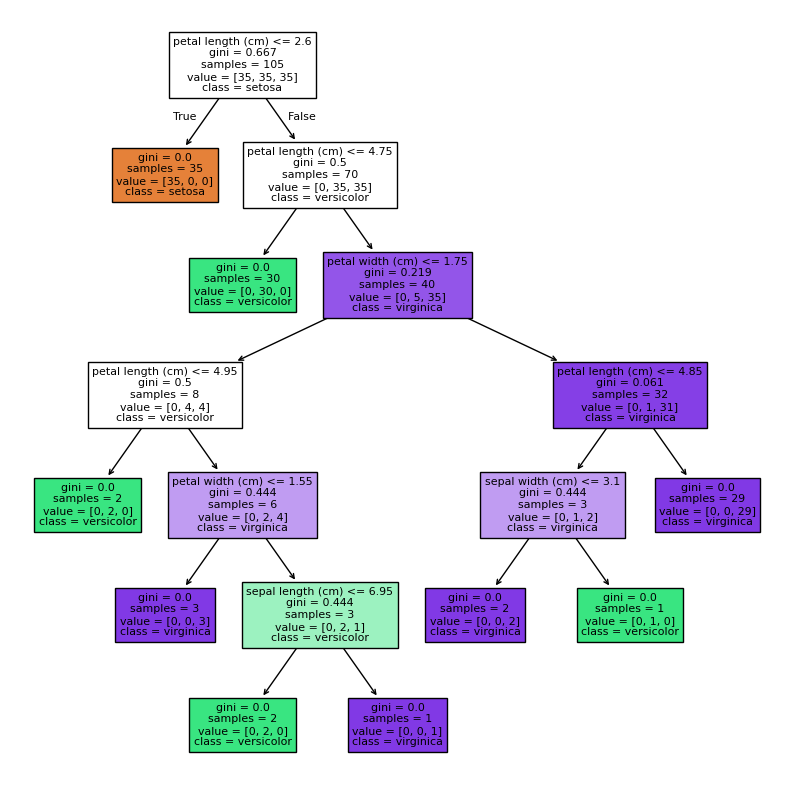

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Interpretacja drzew decyzyjnych

Drzewo decyzyjne zostanie opracowane w celu predykcji kodu błędu odpowiedzi serwera WWW. System komputerowy zostanie zamodelowany, a następnie zostaną wygenerowane przykładowe stany systemu.

## Model systemu komputerowego

System komputerowy składa się z 4 komputerów (C1-C4) oraz czterech serwerów WWW (WWW1-WWW4). Zarówno komputery jak i serwery mają uszkodzone w różnym stopniu karty sieciowe skutkujące niepoprawnymi żądaniami dostępu do treści.

In [18]:
import random

computers = ["C1", "C2", "C3", "C4"]
sites = ["WWW1", "WWW2", "WWW3", "WWW4"]
errors = ["200", "403"]

In [19]:
computers_vec = [1,0.9,0.3,0.89]
sites_vec = [0.99,0.87,0.89,0.3]

def get_log():
    c = random.randrange(len(computers))
    s = random.randrange(len(sites))
    
    if (computers_vec[c] * sites_vec[s]) < random.random():
        e=1
    else:
        e=0
        
    return (computers[c], sites[s], errors[e])


## Przygotowanie danych treningowych

W celu przygotowania danych treningowych zakłada się, że komputery żądają dostępu do treści na serwerach WWW. Ze względu na problemy sprzętowo konfiguracyjne część żądań skutkuje kodem błędu odpowiedzi 403.

In [20]:
N = 50

CS_X = []
CS_y = []

for n in range(N):
    triple = get_log()
    
    #CS_X.append(triple[0:-1])
    #CS_y.append(triple[-1])
    
    print(triple)
    
    CS_X.append((computers.index(triple[0]), sites.index(triple[1])))
    CS_y.append(errors.index(triple[2]))



('C3', 'WWW1', '403')
('C2', 'WWW2', '200')
('C4', 'WWW1', '200')
('C2', 'WWW3', '200')
('C1', 'WWW1', '200')
('C3', 'WWW3', '200')
('C2', 'WWW1', '200')
('C4', 'WWW1', '200')
('C4', 'WWW1', '200')
('C2', 'WWW4', '200')
('C3', 'WWW3', '403')
('C1', 'WWW4', '403')
('C1', 'WWW4', '200')
('C2', 'WWW4', '403')
('C1', 'WWW2', '403')
('C4', 'WWW3', '200')
('C1', 'WWW3', '200')
('C4', 'WWW2', '200')
('C1', 'WWW3', '200')
('C1', 'WWW1', '200')
('C1', 'WWW4', '403')
('C4', 'WWW2', '200')
('C1', 'WWW4', '403')
('C3', 'WWW2', '403')
('C1', 'WWW2', '200')
('C1', 'WWW2', '200')
('C1', 'WWW2', '200')
('C2', 'WWW4', '200')
('C3', 'WWW2', '403')
('C2', 'WWW2', '200')
('C3', 'WWW1', '403')
('C4', 'WWW4', '200')
('C3', 'WWW4', '403')
('C4', 'WWW1', '403')
('C4', 'WWW3', '403')
('C4', 'WWW1', '200')
('C3', 'WWW3', '403')
('C2', 'WWW1', '200')
('C4', 'WWW1', '200')
('C1', 'WWW1', '200')
('C3', 'WWW4', '200')
('C3', 'WWW2', '403')
('C1', 'WWW2', '200')
('C3', 'WWW3', '403')
('C1', 'WWW4', '403')
('C1', 'WW

Wypisz dane treningowe.

In [21]:
print(CS_X)
print(CS_y)

[(2, 0), (1, 1), (3, 0), (1, 2), (0, 0), (2, 2), (1, 0), (3, 0), (3, 0), (1, 3), (2, 2), (0, 3), (0, 3), (1, 3), (0, 1), (3, 2), (0, 2), (3, 1), (0, 2), (0, 0), (0, 3), (3, 1), (0, 3), (2, 1), (0, 1), (0, 1), (0, 1), (1, 3), (2, 1), (1, 1), (2, 0), (3, 3), (2, 3), (3, 0), (3, 2), (3, 0), (2, 2), (1, 0), (3, 0), (0, 0), (2, 3), (2, 1), (0, 1), (2, 2), (0, 3), (0, 1), (1, 2), (1, 1), (1, 3), (0, 0)]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


Zbuduj drzewo decyzyjne z wykorzystaniem biblioteki *sklearn*, a następnie zwizualizuj drzewo decyzyjne.

In [22]:
cs_clf = tree.DecisionTreeClassifier()
cs_clf = cs_clf.fit(CS_X, CS_y)

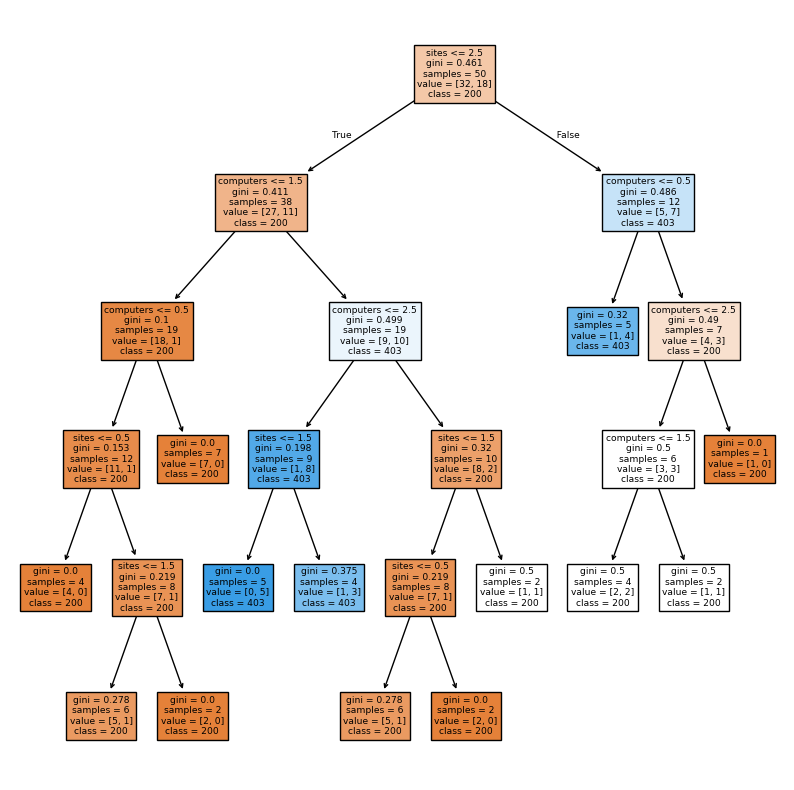

In [23]:
features = ["computers", "sites"]

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf, filled=True, feature_names=features, class_names=errors)
plt.show()

**UWAGA!**

Algorytm budowy drzew decyzyjnych z biblioteki *sklearn* nie pozwala na stosowanie cech jakościowych (categorical data) w wektorze wejściowym - issue #5442.

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

_The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense._

_Using a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on the label ordering, but is computationally expensive._

Uzupełnij kod dokonujący transformacji danych wejściowych zgodnie z *OneHotEncoding*.


In [24]:
#features_onehot = ["C1", "C2", "C3", "C4", "WWW1", "WWW2", "WWW3", "WWW4"]

features_onehot = computers + sites

CS_X_onehot=[]

for t in CS_X:
    l = [0 for _ in range(len(features_onehot))]
    
    l[t[0]]=1
    l[t[1] + len(computers)]=1
    
    CS_X_onehot.append(l)
          


Wypisz dane wejściowe.

In [25]:
print(CS_X_onehot)

[[0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1

Zbuduj drzewo decyzyjne,a następnie je zwizualizuj.

In [26]:
cs_clf_onehot = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
cs_clf_onehot = cs_clf_onehot.fit(CS_X_onehot, CS_y)


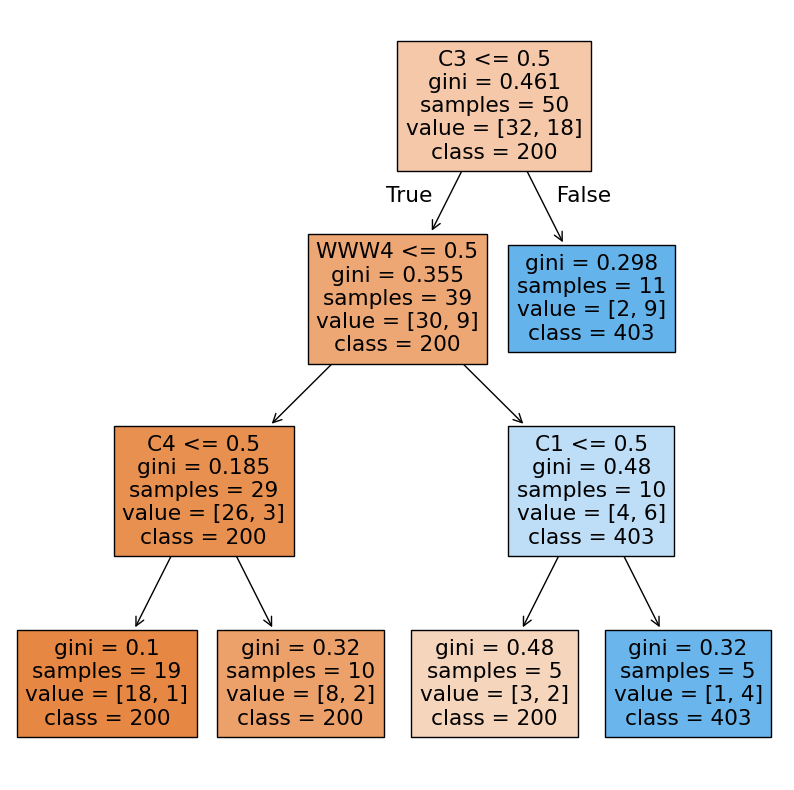

In [27]:
features_onehot = computers + sites

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf_onehot, filled=True, feature_names=features_onehot, class_names=errors)
plt.show()

Przeanalizuj kształt drzewa i opisz wnioski poniżej.

Drzewo jest płytsze niż oryginalne, lepiej pasuje do cech kategorycznych. Co ciekawe komputer C3 jest zawsze klasyfikowany jako popsuty.

# Przydatne źródła

https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/06_trees/code/06-trees_demo.ipynb

http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2019/